In [1]:
# Imports
import numpy as np
from keras.datasets import imdb
from keras import (models, layers)
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10_000) # Get data. Retain 10,000 most frequent words.

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\wis31\appdata\local\programs\python\python39\lib\site-packages\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\wis31\appdata\local\programs\python\python39\lib\site-packages\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

In [3]:
# Initialize index-word mapping
word2index = imdb.get_word_index()
index2word = dict([(value, key) for (key, value) in word2index.items()])

def decode_review(enc_review):
    """Helper function to decode the encoded reviews."""
    decoded_review = ' '.join([index2word.get(i-3, '?') for i in enc_review]) # Indices are offset by 3 (0, 1, 2 reserved for special)
    return decoded_review

In [15]:
def vectorize_sequences(sequences, dimension=10_000):
    """One-hot encode the sequence data into vectors."""
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0 # use sequence as a bool filter.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
# Setup dense network
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10_000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [6]:
# Compile model
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics=["acc"]
             )

In [7]:
# Set aside a validation set
x_val = x_train[:10_000]
partial_x_train = x_train[10_000:]
y_val = y_train[:10_000]
partial_y_train = y_train[10_000:]

In [8]:
# Train model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=5,
                   batch_size=512,
                   validation_data=(x_val, y_val)
                   )

Epoch 1/5
30/30 [==============================] - 9s 34ms/step - loss: 0.5988 - acc: 0.7157 - val_loss: 0.3928 - val_acc: 0.8702
Epoch 2/5
30/30 [==============================] - 1s 19ms/step - loss: 0.3352 - acc: 0.8989 - val_loss: 0.3116 - val_acc: 0.8870
Epoch 3/5
30/30 [==============================] - 1s 19ms/step - loss: 0.2337 - acc: 0.9285 - val_loss: 0.2897 - val_acc: 0.8839
Epoch 4/5
30/30 [==============================] - 1s 19ms/step - loss: 0.1868 - acc: 0.9402 - val_loss: 0.2873 - val_acc: 0.8837
Epoch 5/5
30/30 [==============================] - 1s 18ms/step - loss: 0.1499 - acc: 0.9523 - val_loss: 0.2800 - val_acc: 0.8890


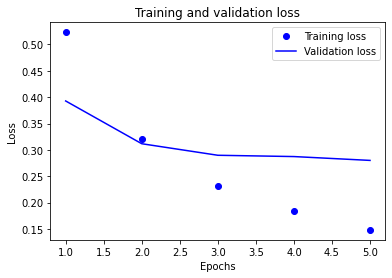

In [9]:
# Plot metrics
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

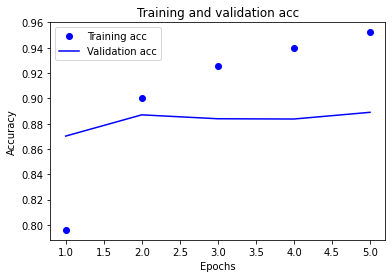

In [10]:
plt.clf()
acc = history_dict["acc"]
val_acc = history_dict["val_acc"]

plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [11]:
# Evaluate model against test data
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2986 - acc: 0.8798


In [12]:
print(results)

[0.2986408770084381, 0.8797600269317627]
